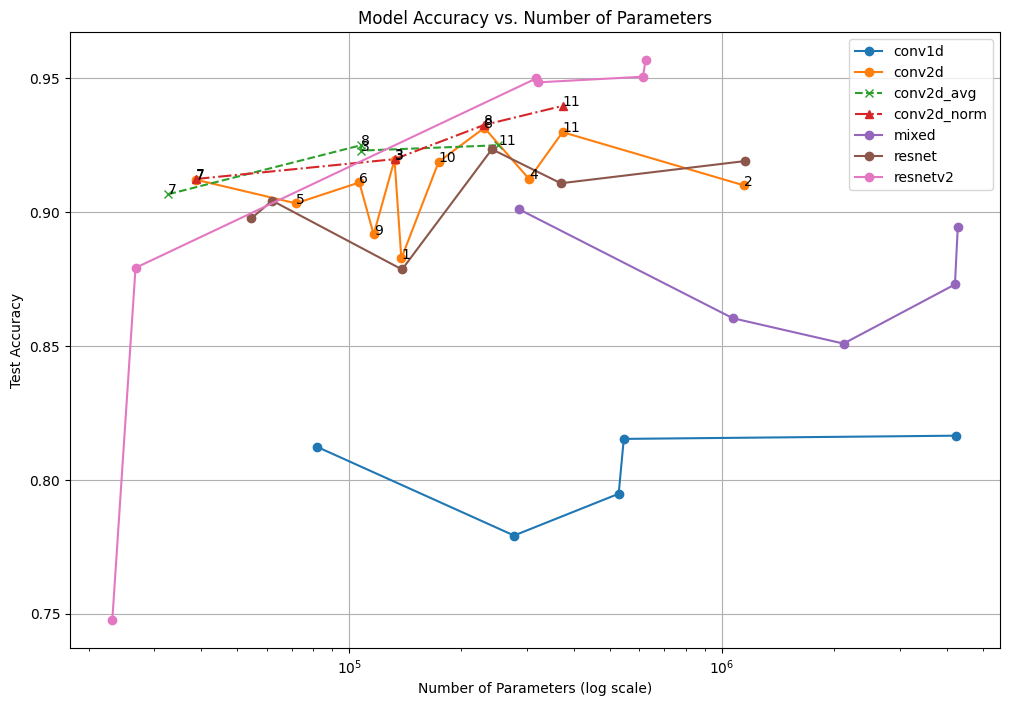

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table (manually extracted for plotting)
# Model, Variant, Num Parameters, Accuracy
data = [
    ('conv1d', 1, 528031, 0.7948),
    ('conv1d', 2, 4233695, 0.8165),
    ('conv1d', 3, 81727, 0.8124),
    ('conv1d', 4, 545023, 0.8153),
    ('conv1d', 5, 276687, 0.7792),

    ('conv2d', 1, 137954, 0.8827),
    ('conv2d', 2, 1145378, 0.9100),
    ('conv2d', 3, 132258, 0.9196),
    ('conv2d', 4, 303554, 0.9124),
    ('conv2d', 5, 71954, 0.9033),
    ('conv2d', 6, 106386, 0.9111),
    ('conv2d', 7, 38850, 0.9121),
    ('conv2d', 8, 230306, 0.9315),
    ('conv2d', 9, 116258, 0.8917),
    ('conv2d', 10, 173698, 0.9188),
    ('conv2d', 11, 373410, 0.9299),
    
    ('conv2d_avg', 3, 107682, 0.9230),
    ('conv2d_avg', 7, 32706, 0.9067),
    ('conv2d_avg', 8, 107426, 0.9250),
    ('conv2d_avg', 11, 250530, 0.9250),
    
    ('conv2d_norm', 3, 132258, 0.9198),
    ('conv2d_norm', 7, 38850, 0.9124),
    ('conv2d_norm', 8, 230306, 0.9326),
    ('conv2d_norm', 11, 373410, 0.9397),

    ('mixed', 1, 285119, 0.9011),
    ('mixed', 2, 4287967, 0.8943),
    ('mixed', 3, 4214175, 0.8730),
    ('mixed', 4, 2118175, 0.8509),
    ('mixed', 5, 1067935, 0.8604),

    ('resnet', 1, 138530, 0.8786),
    ('resnet', 2, 1153762, 0.9191),
    ('resnet', 3, 62114, 0.9043),
    ('resnet', 4, 369442, 0.9108),
    ('resnet', 5, 54610, 0.8977),
    ('resnet', 8, 241314, 0.9235),

    ('resnetv2', 1, 321298, 0.9485),
    ('resnetv2', 2, 613410, 0.9506),
    ('resnetv2', 3, 623650, 0.9568),
    ('resnetv2', 4, 317730, 0.9500),
    ('resnetv2', 6, 26706, 0.8792),
    ('resnetv2', 7, 23138, 0.7476),
]

# Separate data by model type
models = {}
for model, variant, params, acc in data:
    if model not in models:
        models[model] = []
    models[model].append((params, acc, variant))

# Plotting
plt.figure(figsize=(12, 8))

for model_name, values in models.items():
    values.sort()  # Sort by number of parameters
    params, accuracies, variant = zip(*values)
    if model_name == "conv2d":
        plt.plot(params, accuracies, marker='o', label=model_name)
        for i, txt in enumerate(variant):
            plt.annotate(txt, (params[i], accuracies[i]))
    elif model_name == "conv2d_avg":
        plt.plot(params, accuracies, marker='x', label=model_name, linestyle='--')
        for i, txt in enumerate(variant):
            plt.annotate(txt, (params[i], accuracies[i]))
    elif model_name == "conv2d_norm":
        plt.plot(params, accuracies, marker='^', label=model_name, linestyle='-.')
        for i, txt in enumerate(variant):
            plt.annotate(txt, (params[i], accuracies[i]))
    else:
        plt.plot(params, accuracies, marker='o', label=model_name)

plt.xscale('log')  # Log scale for better visualization
plt.xlabel('Number of Parameters (log scale)')
plt.ylabel('Test Accuracy')
plt.title('Model Accuracy vs. Number of Parameters')
plt.legend()
plt.grid(True)
plt.show()